<font size="20"> Carbon Emissions data</font>

# import libraries and data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
CE=pd.read_csv('20190321 Predicting carbonemissions.csv')

In [5]:
CE.head()

,Account ID,Company Name,Listed,Ticker,ISIN,HQ Country,GICS Sector,Accounting Year End,Reported Scope 1 (tCO2e),Estimated Scope 1 (tCO2e),...,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon Emission (tCO2e/mmUSD)
0,30238,Agencia de Proteccion Ambiental,Yes,ADN LN,NaN,NaN,NaN,29/09/2016,0.65,NaN,...,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,539.281077
1,59859,Sociedad Comercial del Plata SA,Yes,COME AR,ARP290071462,Argentina,Energy,31/12/2016,NaN,"1,400",...,0.28,0.31,0.32,arp290071462,0.023033,0.023079,0.033899,0.021700,0.178446,26.030882
2,1408,Banco de Galicia y Buenos Aires S.A.,Yes,GALI AR,NaN,Argentina,Financials,31/12/2016,933.37,NaN,...,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,7.968841
3,20949,YPF SA,Yes,YPFD AR,ARP9897X1319,Argentina,Energy,31/12/2016,NaN,"12,000,000",...,0.07,0.13,0.27,arp9897x1319,0.024063,0.021263,0.030650,0.029235,0.064662,926.111720
4,57626,Australia Post,Yes,1067Z AU,0,Australia,Industrials,30/06/2016,"119,338.00",NaN,...,0.28,0.31,0.32,0,NaN,NaN,NaN,NaN,0.000000,59.908367


In [6]:
CE.columns

Index(['Account ID', 'Company Name', 'Listed', 'Ticker', 'ISIN', 'HQ Country',
       'GICS Sector', 'Accounting Year End', ' Reported Scope 1 (tCO2e) ',
       ' Estimated Scope 1 (tCO2e) ', 'Scope 1 source', 'Scope 1 quality flag',
       ' Reported market-based Scope 2 (tCO2e) ', ' Note ',
       ' Reported location-based Scope 2 (tCO2e) ',
       ' Estimated location-based Scope 2 (tCO2e) ',
       'Location-based Scope 2 source', 'Location-based Scope 2 quality flag',
       'Scope 2 company comments', 'GHG revenue intensity (tCO2e/mmUSD)',
       'Scope 2 figure used for intensity', 'amplification.wordsindex',
       'DeAmplification.wordsindex', 'HE_negativeindex', 'HE_positiveindex',
       'angerindex', 'anticipationindex', 'disgustindex', 'fearindex',
       'joyindex', 'sadnessindex', 'surpriseindex', 'trustindex',
       'LMnegativeindex', 'LMpositiveindex', 'LMuncertaintyindex',
       'BasicNegativeWordsindex', 'PositivePolarisedindex',
       'NegativePolarisedindex', 'P

In [7]:
CE_clean=CE.drop(['GHG revenue intensity (tCO2e/mmUSD)'],axis=1)

In [8]:
CE_clean.head()

,Account ID,Company Name,Listed,Ticker,ISIN,HQ Country,GICS Sector,Accounting Year End,Reported Scope 1 (tCO2e),Estimated Scope 1 (tCO2e),...,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon Emission (tCO2e/mmUSD)
0,30238,Agencia de Proteccion Ambiental,Yes,ADN LN,NaN,NaN,NaN,29/09/2016,0.65,NaN,...,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,539.281077
1,59859,Sociedad Comercial del Plata SA,Yes,COME AR,ARP290071462,Argentina,Energy,31/12/2016,NaN,"1,400",...,0.28,0.31,0.32,arp290071462,0.023033,0.023079,0.033899,0.021700,0.178446,26.030882
2,1408,Banco de Galicia y Buenos Aires S.A.,Yes,GALI AR,NaN,Argentina,Financials,31/12/2016,933.37,NaN,...,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,7.968841
3,20949,YPF SA,Yes,YPFD AR,ARP9897X1319,Argentina,Energy,31/12/2016,NaN,"12,000,000",...,0.07,0.13,0.27,arp9897x1319,0.024063,0.021263,0.030650,0.029235,0.064662,926.111720
4,57626,Australia Post,Yes,1067Z AU,0,Australia,Industrials,30/06/2016,"119,338.00",NaN,...,0.28,0.31,0.32,0,NaN,NaN,NaN,NaN,0.000000,59.908367


In [9]:
CE_clean.columns

Index(['Account ID', 'Company Name', 'Listed', 'Ticker', 'ISIN', 'HQ Country',
       'GICS Sector', 'Accounting Year End', ' Reported Scope 1 (tCO2e) ',
       ' Estimated Scope 1 (tCO2e) ', 'Scope 1 source', 'Scope 1 quality flag',
       ' Reported market-based Scope 2 (tCO2e) ', ' Note ',
       ' Reported location-based Scope 2 (tCO2e) ',
       ' Estimated location-based Scope 2 (tCO2e) ',
       'Location-based Scope 2 source', 'Location-based Scope 2 quality flag',
       'Scope 2 company comments', 'Scope 2 figure used for intensity',
       'amplification.wordsindex', 'DeAmplification.wordsindex',
       'HE_negativeindex', 'HE_positiveindex', 'angerindex',
       'anticipationindex', 'disgustindex', 'fearindex', 'joyindex',
       'sadnessindex', 'surpriseindex', 'trustindex', 'LMnegativeindex',
       'LMpositiveindex', 'LMuncertaintyindex', 'BasicNegativeWordsindex',
       'PositivePolarisedindex', 'NegativePolarisedindex', 'PowerWordsindex',
       'PrudentialNegativeind

# Analyse data 

In [10]:
Company_emissions=CE_clean[['Company Name','Carbon Emission  (tCO2e/mmUSD)']]

In [11]:
Company_emissions.head()

,Company Name,Carbon Emission (tCO2e/mmUSD)
0,Agencia de Proteccion Ambiental,539.281077
1,Sociedad Comercial del Plata SA,26.030882
2,Banco de Galicia y Buenos Aires S.A.,7.968841
3,YPF SA,926.111720
4,Australia Post,59.908367


In [12]:
company_sector=CE_clean.pivot_table(index='Company Name', columns='GICS Sector',values='Carbon Emission  (tCO2e/mmUSD)')

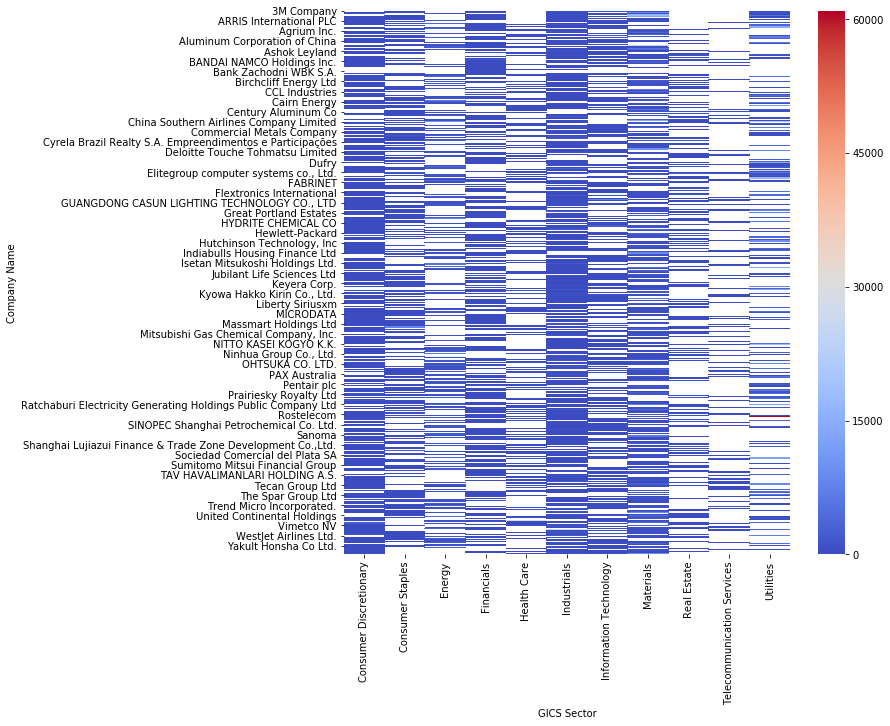

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(company_sector,cmap='coolwarm');

In [14]:
Company_emissions.max()
#identifies which company releases the most carbon

Company Name                      ÜLKER BISKÜVI SANAYI A.S.
Carbon Emission  (tCO2e/mmUSD)                      60946.6
dtype: object

In [93]:
CE_clean.loc[CE_clean['Company Name'] == 'ÜLKER BISKÜVI SANAYI A.S.']
#I located the row of this company, in order to get some more information
#The company is based in Turkey and in the Consumer Staples industry

,Account ID,Company Name,Listed,Ticker,ISIN,HQ Country,GICS Sector,Accounting Year End,Reported Scope 1 (tCO2e),Estimated Scope 1 (tCO2e),...,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon Emission (tCO2e/mmUSD)
2665,21157,ÜLKER BISKÜVI SANAYI A.S.,Yes,ULKER TI,TREULKR00015,Turkey,Consumer Staples,31/12/2016,"72,177.00",NaN,...,0.28,0.31,0.32,treulkr00015,0.023102,0.019944,0.03175,0.027849,0.073434,108.81815


In [15]:
Company_emissions.min()

Company Name                      3M Company
Carbon Emission  (tCO2e/mmUSD)             0
dtype: object

In [16]:
Company_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 2 columns):
Company Name                      3987 non-null object
Carbon Emission  (tCO2e/mmUSD)    3987 non-null float64
dtypes: float64(1), object(1)
memory usage: 62.4+ KB


In [17]:
Company_emissions.describe()

,Carbon Emission (tCO2e/mmUSD)
count,3987.000000
mean,539.281077
std,2126.047089
min,0.000000
25%,14.963002
50%,53.491972
75%,259.786994
max,60946.572930


In [18]:
Sector_emissions=CE_clean[['Company Name','GICS Sector','Carbon Emission  (tCO2e/mmUSD)','HQ Country']]

In [19]:
Sector_emissions.head()

,Company Name,GICS Sector,Carbon Emission (tCO2e/mmUSD),HQ Country
0,Agencia de Proteccion Ambiental,NaN,539.281077,NaN
1,Sociedad Comercial del Plata SA,Energy,26.030882,Argentina
2,Banco de Galicia y Buenos Aires S.A.,Financials,7.968841,Argentina
3,YPF SA,Energy,926.111720,Argentina
4,Australia Post,Industrials,59.908367,Australia


In [20]:
country_sector=CE_clean.pivot_table(index='HQ Country', columns='GICS Sector',values='Carbon Emission  (tCO2e/mmUSD)')

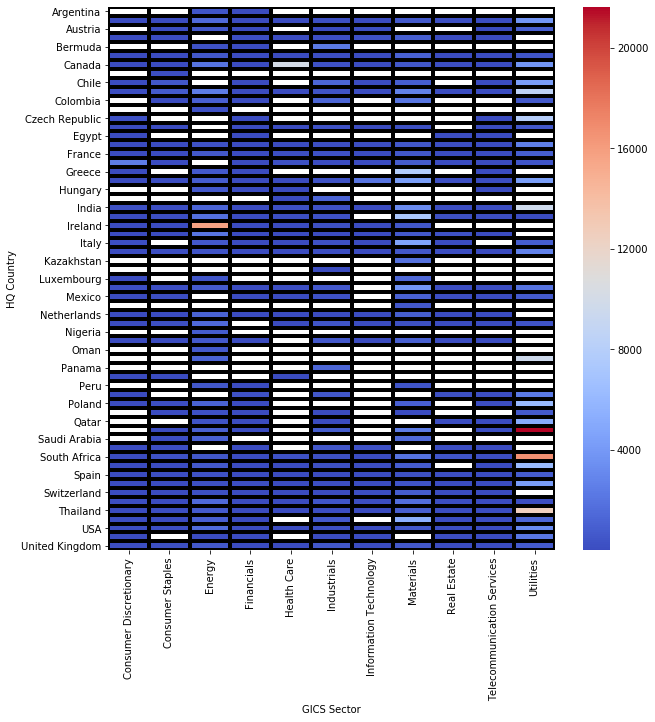

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(country_sector,cmap='coolwarm', linecolor='black', linewidths=3);

#e.g. Carbon emissions from the Utilities industry, is very high in Qatar
#Kazakhstan, Oman and Panama, emitted the least amount of emissions overall, across the least number of industries
#Emissions from the Utilities industry in SA and the energy industry in Ireland; were relatively high
#overall, for the majority of countries, emissions were on the lower end across all industries

# Create visualizations

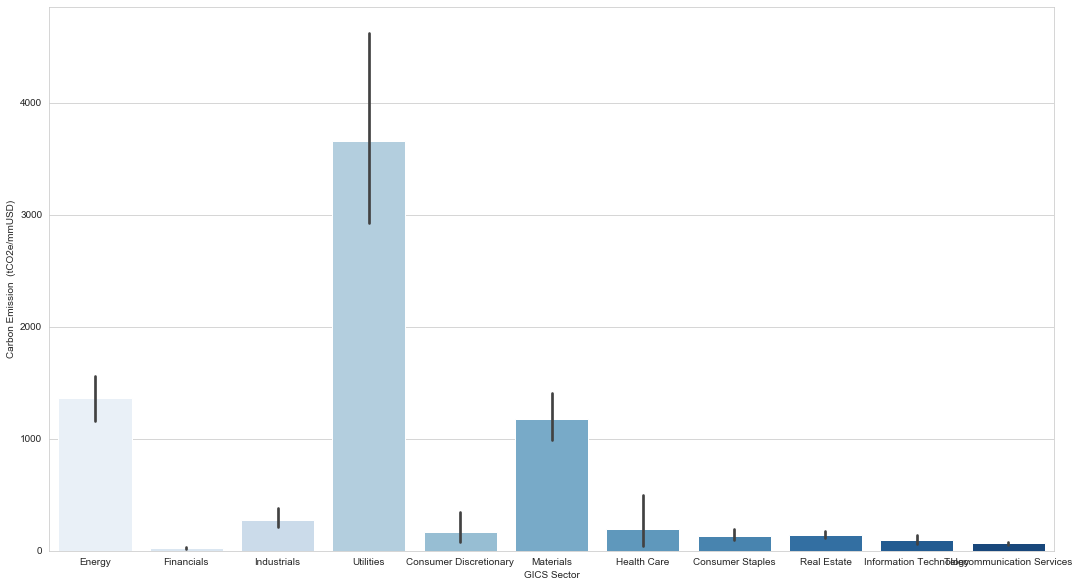

In [92]:
plt.figure(figsize=(18,10))
sns.barplot(x = 'GICS Sector', y = 'Carbon Emission  (tCO2e/mmUSD)', data = CE_clean,
            palette = 'Blues',edgecolor = 'w');
#Emissions from different sectors
#Utilities emits the most carbon by far. The energy and materials sector is next up; although its much lower than utilities.
#Financials showed no emissions, so the scope clearly wasn't reported

In [101]:
GICS_Sum=CE_clean.groupby('GICS Sector')['Carbon Emission  (tCO2e/mmUSD)'].sum()
GICS_Sum
#I summed up the carbon emissions of each GICS category
#This is more accurate as it has collected the carbon emissions of each GICS category
#across the whole datafram

GICS Sector
Consumer Discretionary         99557.932527
Consumer Staples               47930.792732
Energy                        359456.333245
Financials                     10409.185789
Health Care                    41445.108803
Industrials                   194610.507254
Information Technology         37979.072171
Materials                     555628.363810
Real Estate                    26464.230717
Telecommunication Services      7171.188896
Utilities                     768921.655722
Name: Carbon Emission  (tCO2e/mmUSD), dtype: float64

In [137]:
#I used this data so that I could create a new dataframe out of it
#I will then be able to use this dataframe to create a new and more accurate bar chart of this information

GICS_Carbon = pd.DataFrame([
    ['Energy',359456.333245],['Financials',10409.185789],['Industrials',194610.507254],
    ['Utilities',768921.655722],['Consumer Discretionary ', 99557.932527],['Materials ',555628.363810],
    ['Health Care',41445.108803],['Consumer Staples',47930.792732],['Real Estate',26464.230717],
    ['Information Technology',37979.072171],['Telecommunication Services',7171.188896]],
    columns=['GICS Sector','Carbon Emission (tCO2e/mmUSD)']);

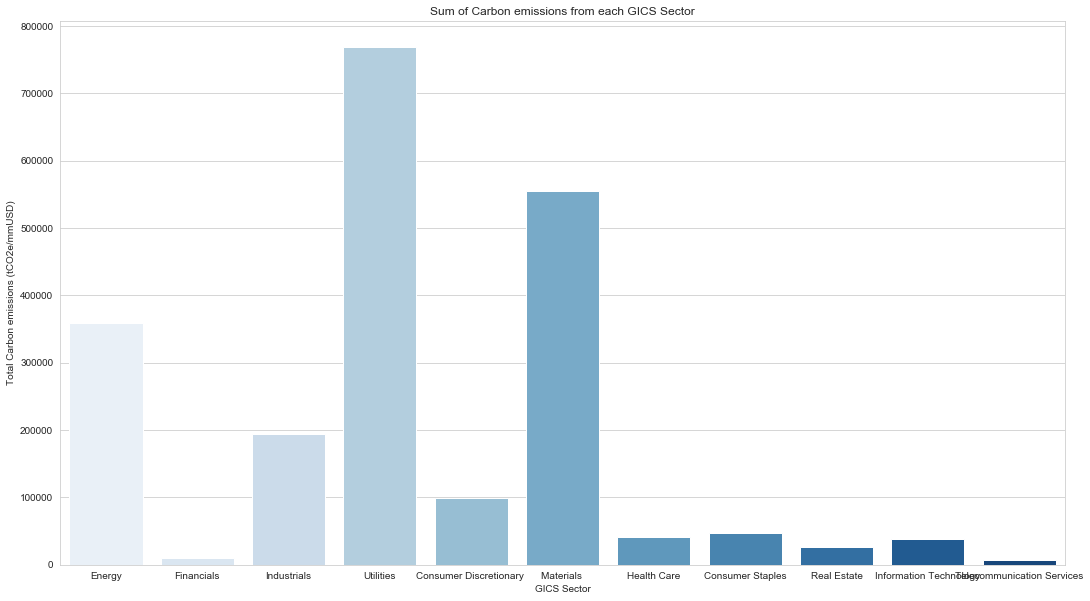

In [143]:
plt.figure(figsize=(18,10))
sns.barplot(x='GICS Sector',y='Carbon Emission (tCO2e/mmUSD)',data = GICS_Carbon,
            palette = 'Blues',edgecolor = 'w');

plt.title('Sum of Carbon emissions from each GICS Sector')
plt.ylabel('Total Carbon emissions (tCO2e/mmUSD)');

#The Utilities industry still produces the most carbon emissions, 
#but the difference between the other sectors isn't as vast
#The materials and energy sector is next up, then the industrial sector at just uner 200000 units
#The rest of the sectors are relatively at the same level.
#Financials is still very low; Telecommunication services being the lowest

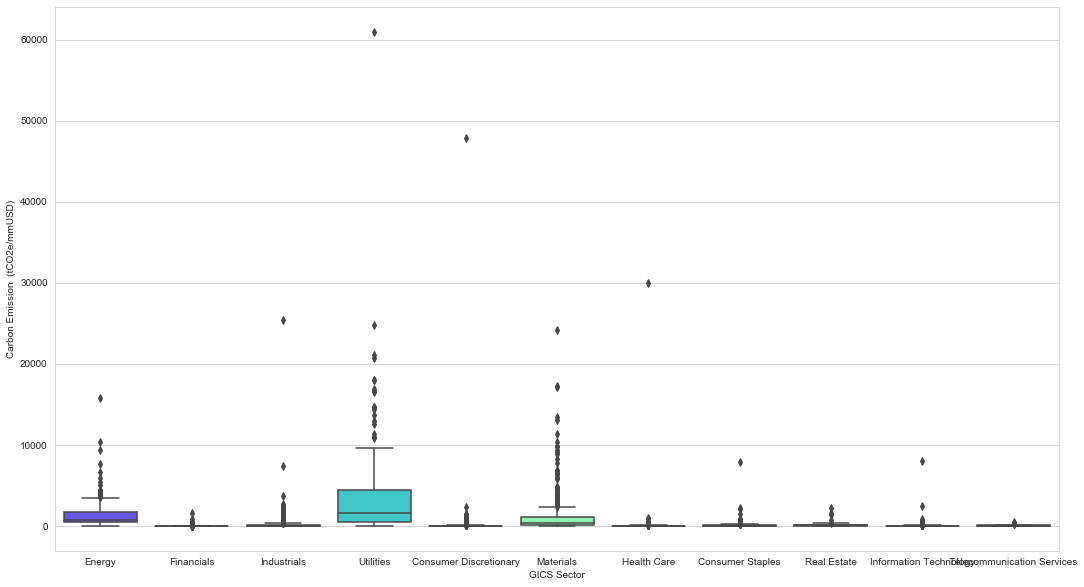

In [134]:
plt.figure(figsize=(18,10))
sns.boxplot(x='GICS Sector', y='Carbon Emission  (tCO2e/mmUSD)', data=CE_clean,palette='rainbow');
#This is a boxplot for the same data, but analyses individual carbon emissions in each GICS category
#Middle line of the box is the mean, upper line=upper quartile, lower line=lower quartile
#dots represent the outliers
#Horizontal line above the box represents the highest value
#Horizontal line below the box represents the lowest value

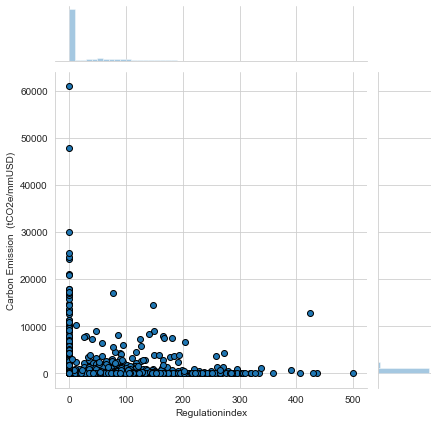

In [22]:
sns.set_style('whitegrid') 
sns.jointplot(x='Regulationindex',y='Carbon Emission(tCO2e/mmUSD)',data=CE_clean,kind='scatter',edgecolor='black');

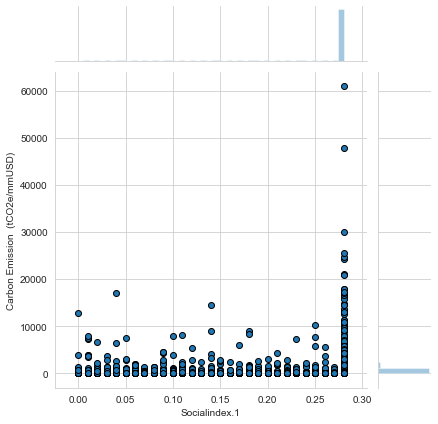

In [23]:
sns.set_style('whitegrid') 
sns.jointplot(x='Socialindex.1',y='Carbon Emission  (tCO2e/mmUSD)',data=CE_clean,kind='scatter',edgecolor='black');

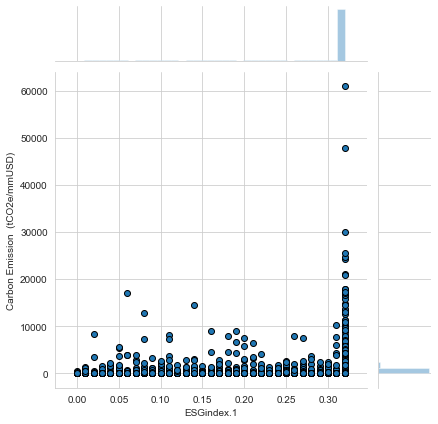

In [24]:
sns.set_style('whitegrid') 
sns.jointplot(x='ESGindex.1',y='Carbon Emission  (tCO2e/mmUSD)',data=CE_clean,kind='scatter',edgecolor='black');

# Logistic regression
I am setting the data up for this machine learning model. Before the data can be read by the model, the categorical features need to be converted into a numerical format, in order for them to be readable by the ML model

In [25]:
testing_data=CE_clean[[ 'ESGindex.1', 'Regulationindex.1','Socialindex.1','VolFactor',
                       'GICS Sector','Carbon Emission  (tCO2e/mmUSD)']]
#create a dataframe of all of the features that I want to examine

In [26]:
CE_clean['GICS Sector'].nunique()

11

In [52]:
CE_clean['GICS Sector'].unique()

array([nan, 'Energy', 'Financials', 'Industrials', 'Utilities',
       'Consumer Discretionary', 'Materials', 'Health Care',
       'Consumer Staples', 'Real Estate', 'Information Technology',
       'Telecommunication Services'], dtype=object)

In [27]:
GICS=['GICS Sector']  
#'GICS Sector' is a categorical feature, so in order to convert them to numerical formats, 
#which are readable by the model,
#I first need to make it a list

In [54]:
final_CE=pd.get_dummies(testing_data,columns=GICS,drop_first=True)
#Create a new dataframe of the testing_data, with dummy variables for the categorical features

In [55]:
final_CE.head()

,ESGindex.1,Regulationindex.1,Socialindex.1,VolFactor,Company Name,Carbon Emission (tCO2e/mmUSD),GICS Sector_Consumer Staples,GICS Sector_Energy,GICS Sector_Financials,GICS Sector_Health Care,GICS Sector_Industrials,GICS Sector_Information Technology,GICS Sector_Materials,GICS Sector_Real Estate,GICS Sector_Telecommunication Services,GICS Sector_Utilities
0,0.32,0.32,0.28,0.000000,Agencia de Proteccion Ambiental,539.281077,0,0,0,0,0,0,0,0,0,0
1,0.32,0.32,0.28,0.178446,Sociedad Comercial del Plata SA,26.030882,0,1,0,0,0,0,0,0,0,0
2,0.32,0.32,0.28,0.000000,Banco de Galicia y Buenos Aires S.A.,7.968841,0,0,1,0,0,0,0,0,0,0
3,0.27,0.12,0.07,0.064662,YPF SA,926.111720,0,1,0,0,0,0,0,0,0,0
4,0.32,0.32,0.28,0.000000,Australia Post,59.908367,0,0,0,0,1,0,0,0,0,0


In [56]:
final_CE.columns

Index(['ESGindex.1', 'Regulationindex.1', 'Socialindex.1', 'VolFactor',
       'Company Name', 'Carbon Emission  (tCO2e/mmUSD)',
       'GICS Sector_Consumer Staples', 'GICS Sector_Energy',
       'GICS Sector_Financials', 'GICS Sector_Health Care',
       'GICS Sector_Industrials', 'GICS Sector_Information Technology',
       'GICS Sector_Materials', 'GICS Sector_Real Estate',
       'GICS Sector_Telecommunication Services', 'GICS Sector_Utilities'],
      dtype='object')

In [57]:
CE_corr=final_CE.corr()
#I put this data in a matrix form, so that I can look at correlations

In [58]:
CE_corr

,ESGindex.1,Regulationindex.1,Socialindex.1,VolFactor,Carbon Emission (tCO2e/mmUSD),GICS Sector_Consumer Staples,GICS Sector_Energy,GICS Sector_Financials,GICS Sector_Health Care,GICS Sector_Industrials,GICS Sector_Information Technology,GICS Sector_Materials,GICS Sector_Real Estate,GICS Sector_Telecommunication Services,GICS Sector_Utilities
ESGindex.1,1.000000,0.747622,0.673070,-0.160604,0.035898,0.044878,-0.026567,-0.208448,0.002516,0.038792,0.043520,0.062746,-0.007357,0.007472,-0.028296
Regulationindex.1,0.747622,1.000000,0.649753,-0.111095,0.015835,0.031719,-0.035253,-0.076188,-0.014113,0.037084,0.018402,-0.003678,0.009241,-0.031415,-0.029484
Socialindex.1,0.673070,0.649753,1.000000,-0.131620,0.008495,0.049611,-0.022936,-0.115537,-0.057629,0.071223,0.010206,0.047204,0.017548,-0.054530,-0.090016
VolFactor,-0.160604,-0.111095,-0.131620,1.000000,-0.017373,-0.006365,-0.061804,0.199759,0.010025,-0.050504,-0.099242,-0.066569,0.122554,0.044624,0.127801
Carbon Emission (tCO2e/mmUSD),0.035898,0.015835,0.008495,-0.017373,1.000000,-0.059159,0.103007,-0.089160,-0.038126,-0.056582,-0.070736,0.110260,-0.042477,-0.036666,0.346326
GICS Sector_Consumer Staples,0.044878,0.031719,0.049611,-0.006365,-0.059159,1.000000,-0.082995,-0.114210,-0.073675,-0.143704,-0.105087,-0.114072,-0.070103,-0.051508,-0.073490
GICS Sector_Energy,-0.026567,-0.035253,-0.022936,-0.061804,0.103007,-0.082995,1.000000,-0.097581,-0.062948,-0.122780,-0.089787,-0.097463,-0.059896,-0.044008,-0.062790
GICS Sector_Financials,-0.208448,-0.076188,-0.115537,0.199759,-0.089160,-0.114210,-0.097581,1.000000,-0.086623,-0.168959,-0.123556,-0.134120,-0.082424,-0.060560,-0.086406
GICS Sector_Health Care,0.002516,-0.014113,-0.057629,0.010025,-0.038126,-0.073675,-0.062948,-0.086623,1.000000,-0.108993,-0.079704,-0.086519,-0.053170,-0.039067,-0.055739
GICS Sector_Industrials,0.038792,0.037084,0.071223,-0.050504,-0.056582,-0.143704,-0.122780,-0.168959,-0.108993,1.000000,-0.155463,-0.168756,-0.103709,-0.076200,-0.108720


I produced this heatmap, to show the correlation between carbon emissions and other features; as well as the correlations between other features.

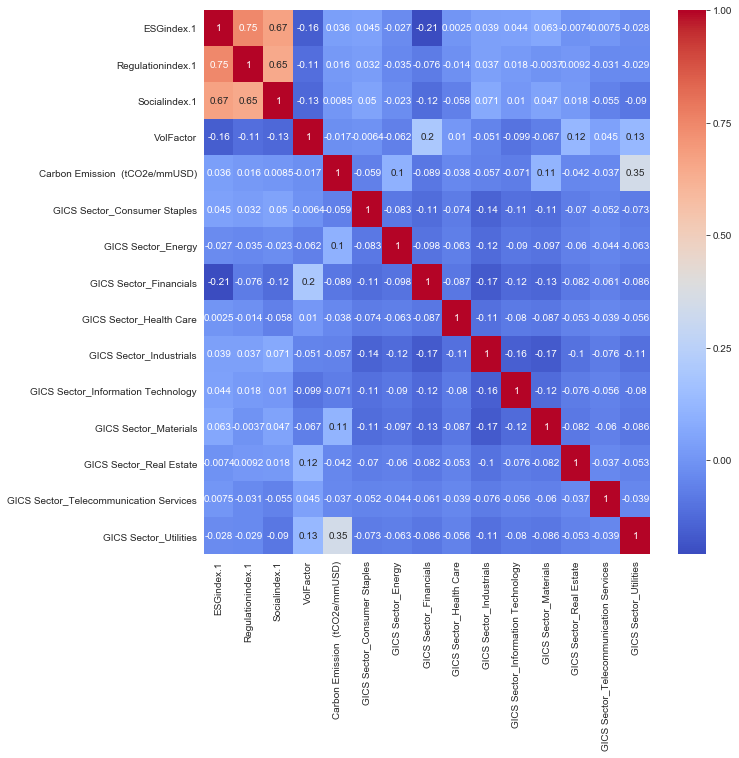

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(CE_corr,cmap='coolwarm',annot=True);
#Carbon emissions do not scarcely have any correlation with the other features that I have tested, 
#or any of the industries that are included

#ESGindex, Regulationindex and Socialindex correlate well with one another

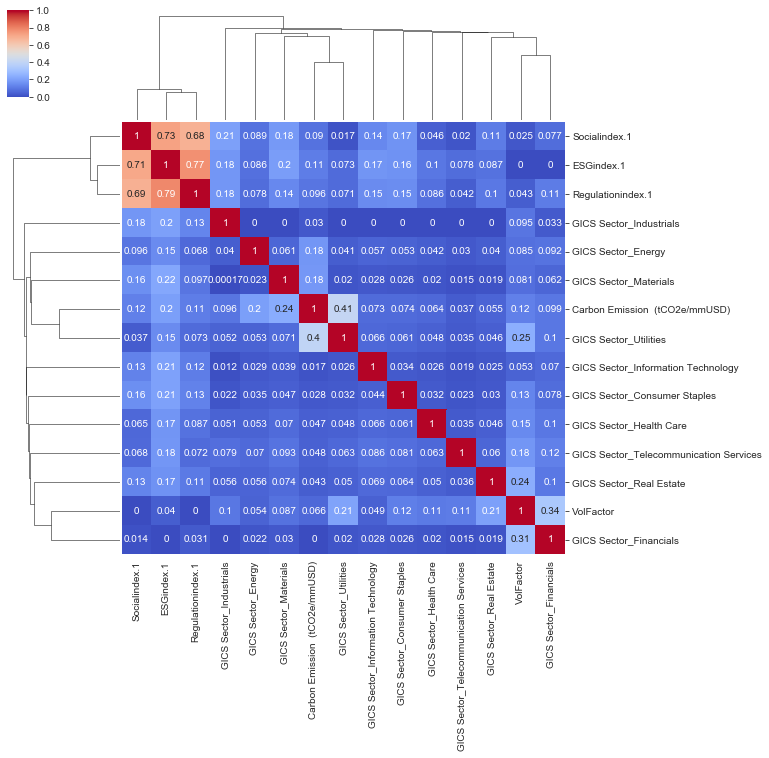

In [80]:
sns.clustermap(CE_corr,cmap='coolwarm',standard_scale=1,annot=True);
#The clustermap groups together the features that are most similar to each other
#This makes it slightly more apparent than on the heatmap

# Train-Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [76]:
X=final_CE.drop('Carbon Emission  (tCO2e/mmUSD)',axis=1) #drops carbon emissions and the empty columns that we are not testing
y=final_CE['Carbon Emission  (tCO2e/mmUSD)'] #Carbon emissions is our target data

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                                    random_state=101)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel = LogisticRegression()

In [66]:
from sklearn import preprocessing
from sklearn import utils

In [67]:
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

#encode labels to avoid the unknown label type 'continuous' error
#You are passing floats to a classifier which expects categorical values as the target vector.
#That's why it's best to encode the y_train data

#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
#https://www.kaggle.com/pratsiuk/valueerror-unknown-label-type-continuous

In [68]:
print(utils.multiclass.type_of_target(y_train))
#class was continuous, which was giving me my error

continuous


In [69]:
print(utils.multiclass.type_of_target(y_train_encoded))
#now the transformed version is 'multiclass', so it will work

multiclass


In [78]:
print(utils.multiclass.type_of_target(X_train))
#This class for the X_train features was always fine, as this is what is expected

TypeError: '<' not supported between instances of 'str' and 'int'

In [74]:
logmodel.fit(X_train,y_train_encoded) 
#the result shows us the default parameters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'HeidelbergCement AG'

# Predictions and Evaluations

In [45]:
print(utils.multiclass.type_of_target(X_test))

continuous-multioutput


In [46]:
print(utils.multiclass.type_of_target(y_test))

continuous


In [47]:
y_test_encoded = lab_enc.fit_transform(y_test)
print(utils.multiclass.type_of_target(y_test_encoded))

multiclass


In [48]:
predictions = logmodel.predict(X_test)
#predict values for the testing data

In [49]:
predictions

array([2273, 2273, 2273, ..., 2273, 2273, 2273], dtype=int64)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,predictions))

#I hit a roadblock here. Was unable to produce a classification report for a logistic regression. 
#I don't know if there is anyway around this.
#All machine learning models use this, so need to find a way around this.

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets